For models with $N$ parameters, we need to search over an $N$-dimensional space. Each point in this space is given a (prior and posterior) probability value.

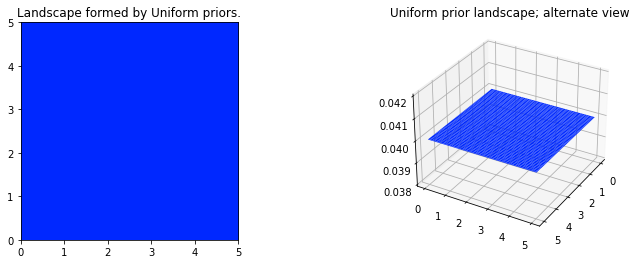

In [1]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
figsize(12.5, 4)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

jet = plt.cm.jet
fig = plt.figure()
x = y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

plt.subplot(121)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(y, loc=0, scale=5)
M = np.dot(uni_x[:, None], uni_y[None, :])
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("Landscape formed by Uniform priors.")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=plt.cm.jet, vmax=1, vmin=-.15)
ax.view_init(azim=390)
plt.title("Uniform prior landscape; alternate view");

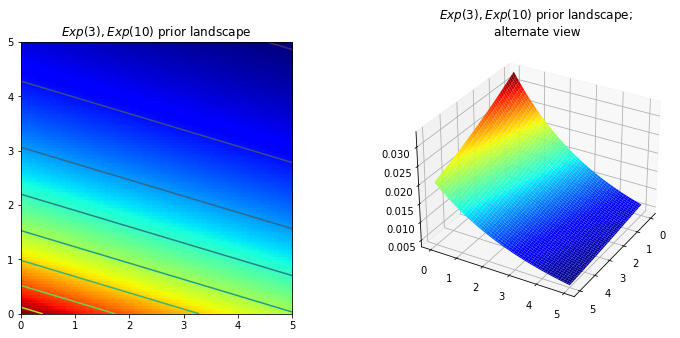

In [2]:
figsize(12.5, 5)
fig = plt.figure()
plt.subplot(121)

exp_x = stats.expon.pdf(x, scale=3)
exp_y = stats.expon.pdf(x, scale=10)
M = np.dot(exp_x[:, None], exp_y[None, :])
CS = plt.contour(X, Y, M)
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))
#plt.xlabel("prior on $p_1$")
#plt.ylabel("prior on $p_2$")
plt.title("$Exp(3), Exp(10)$ prior landscape")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=jet)
ax.view_init(azim=390)
plt.title("$Exp(3), Exp(10)$ prior landscape; \nalternate view");

In [7]:
# create the observed data

# sample size of data we observe, trying varying this (keep it less than 100 ;)
N = 25

# the true parameters, but of course we do not see these values...
lambda_1_true = 1
lambda_2_true = 3

#...we see the data generated, dependent on the above two values.
data = np.concatenate([
    stats.poisson.rvs(lambda_1_true, size=(N, 1)),
    stats.poisson.rvs(lambda_2_true, size=(N, 1))
], axis=1)
print("observed (2-dimensional,sample size = %d):" % N, data)

# plotting details.
x = y = np.linspace(.01, 5, 100)
likelihood_x = np.array([stats.poisson.pmf(data[:, 0], _x)
                        for _x in x]).prod(axis=1)
likelihood_y = np.array([stats.poisson.pmf(data[:, 1], _y)
                        for _y in y]).prod(axis=1)
L = np.dot(likelihood_x[:, None], likelihood_y[None, :])

observed (2-dimensional,sample size = 25): [[1 2]
 [0 2]
 [0 2]
 [1 5]
 [1 2]
 [1 2]
 [2 3]
 [2 2]
 [0 4]
 [3 4]
 [0 2]
 [2 5]
 [1 3]
 [1 4]
 [0 5]
 [1 3]
 [1 1]
 [0 1]
 [3 2]
 [1 2]
 [1 3]
 [1 1]
 [1 9]
 [0 0]
 [0 2]]


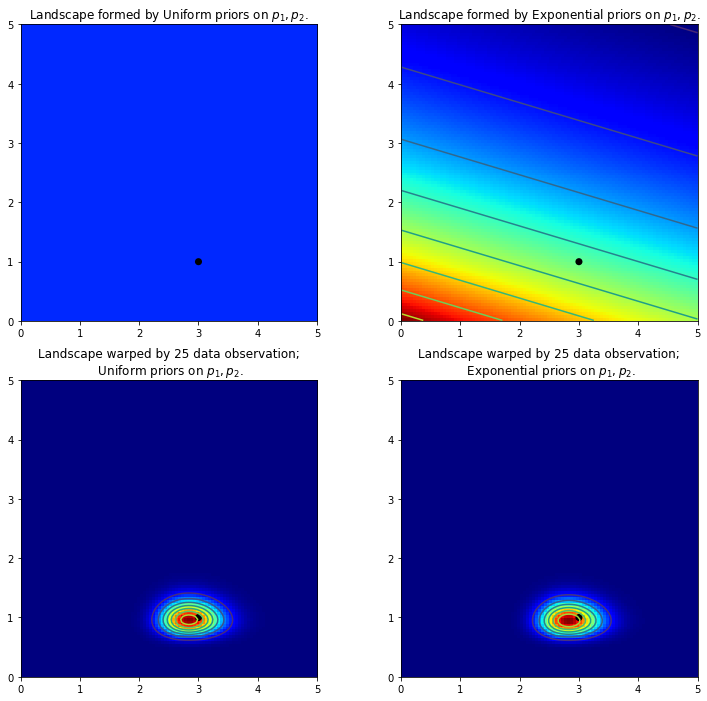

In [8]:
figsize(12.5, 12)
# matplotlib heavy lifting below, beware!
plt.subplot(221)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(x, loc=0, scale=5)
M = np.dot(uni_x[:, None], uni_y[None, :])
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))
plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("Landscape formed by Uniform priors on $p_1, p_2$.")

plt.subplot(223)
plt.contour(x, y, M * L)
im = plt.imshow(M * L, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))
plt.title("Landscape warped by %d data observation;\n Uniform priors on $p_1, p_2$." % N)
plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.xlim(0, 5)
plt.ylim(0, 5)

plt.subplot(222)
exp_x = stats.expon.pdf(x, loc=0, scale=3)
exp_y = stats.expon.pdf(x, loc=0, scale=10)
M = np.dot(exp_x[:, None], exp_y[None, :])

plt.contour(x, y, M)
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))
plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("Landscape formed by Exponential priors on $p_1, p_2$.")

plt.subplot(224)
# This is the likelihood times prior, that results in the posterior.
plt.contour(x, y, M * L)
im = plt.imshow(M * L, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))

plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.title("Landscape warped by %d data observation;\n Exponential priors on \
$p_1, p_2$." % N)
plt.xlim(0, 5)
plt.ylim(0, 5);

$ Pr\left( y, p_1, p_2 \right) = Pr\left(y | p_1, p_2 \right) Pr\left(p_1, p_2\right) \propto Pr\left(p_1, p_2 | y\right) $

MAP values (p_1_MAP, p_2_MAP)

for i in range(1000):
    (p_1_i, p_2_i) -> p(y | p_1_i, p_2_i)

## Mixture Model

[115.85679142 152.26153716 178.87449059 162.93500815 107.02820697
 105.19141146 118.38288501 125.3769803  102.88054011 206.71326136] ...


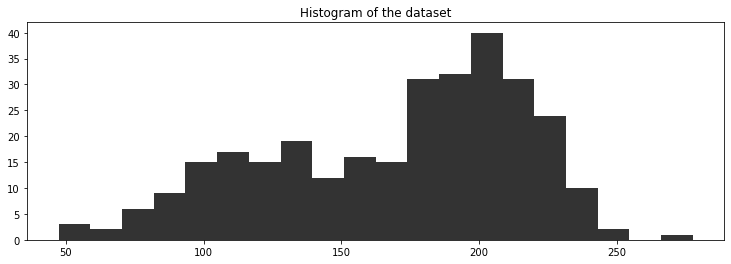

In [24]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('data/mixture_data.csv')

fig, ax = plt.subplots()
ax.hist(data, bins=20, color="k", histtype="stepfilled", alpha=0.8)
ax.set_title("Histogram of the dataset")
ax.set_ylim([0, None]);
print(data[:10], "...")

In [32]:
import pymc3 as pm
import theano

with pm.Model() as model:
    # 
    p1 = pm.Uniform('p1', 0, 1)
    p2 = pm.Deterministic('p2', 1 - p1)
    p = theano.tensor.stack([p1, p2])
    # assignment variable
    z = pm.Categorical('z', p, shape=data.shape[0], testval=np.random.randint(0, 2, data.shape[0]))

    # (2) normal component parameters
    means = pm.Normal('means',
        mu=np.array([120, 190]),
        sd=np.array([50, 50]),
        shape=2,
    )
    stds = pm.Uniform('stds', 0, 100, shape=2)

    # latent observations
    mean_i = pm.Deterministic('mean_i', means[z])
    std_i = pm.Deterministic('std_i', stds[z])

    # likelihood
    obs = pm.Normal('obs', mu=mean_i, sd=std_i, observed=data)

print("Random assignments: ", z.tag.test_value[:4], "...")
print("Assigned center: ", mean_i.tag.test_value[:4], "...")
print("Assigned standard deviation: ", std_i.tag.test_value[:4], "...")

Random assignments:  [0 1 1 0] ...
Assigned center:  [120. 190. 190. 120.] ...
Assigned standard deviation:  [50. 50. 50. 50.] ...


In [33]:
with model:
    step1 = pm.Metropolis(vars=[p, stds, means])
    step2 = pm.ElemwiseCategorical(vars=[z])
    trace = pm.sample(25000, step=[step1, step2])

/tmp/ipykernel_29043/4097916079.py:3: DeprecationWarning: ElemwiseCategorical is deprecated, switch to CategoricalGibbsMetropolis.
  step2 = pm.ElemwiseCategorical(vars=[z])
/tmp/ipykernel_29043/4097916079.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(25000, step=[step1, step2])
Sequential sampling (2 chains in 1 job)
CompoundStep
>CompoundStep
>>Metropolis: [means]
>>Metropolis: [stds]
>>Metropolis: [p1]
>ElemwiseCategorical: [z]


Sampling 2 chains for 1_000 tune and 25_000 draw iterations (2_000 + 50_000 draws total) took 355 seconds.
/home/DKS0559531/anaconda3/envs/pymc3_env/lib/python3.10/site-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The estimated number of effective samples is smaller than 200 for some parameters.


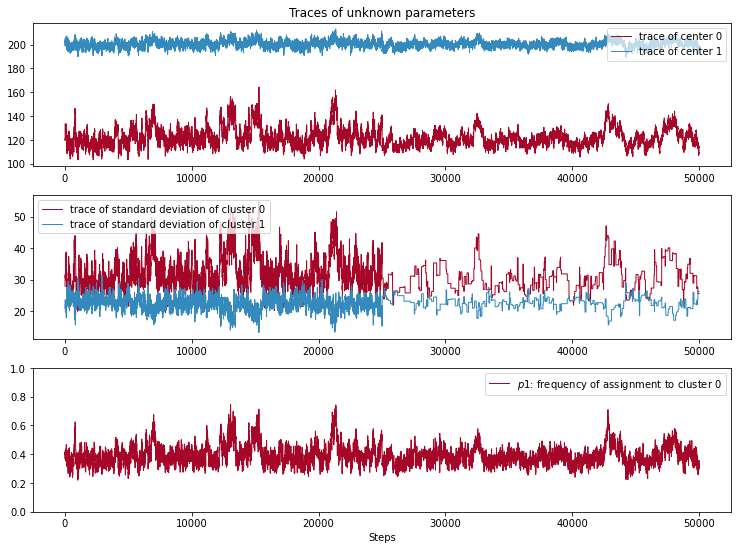

In [43]:
figsize(12.5, 9)
plt.subplot(311)
lw = 1
center_trace = trace["means"]

# for pretty colors later in the book.
colors = ["#348ABD", "#A60628"] if center_trace[-1, 0] > center_trace[-1, 1] \
    else ["#A60628", "#348ABD"]

plt.plot(center_trace[:, 0], label="trace of center 0", c=colors[0], lw=lw)
plt.plot(center_trace[:, 1], label="trace of center 1", c=colors[1], lw=lw)
plt.title("Traces of unknown parameters")
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(0.7)

plt.subplot(312)
std_trace = trace["stds"]
plt.plot(std_trace[:, 0], label="trace of standard deviation of cluster 0",
     c=colors[0], lw=lw)
plt.plot(std_trace[:, 1], label="trace of standard deviation of cluster 1",
     c=colors[1], lw=lw)
plt.legend(loc="upper left")

plt.subplot(313)
p_trace = trace["p1"]
plt.plot(p_trace, label="$p1$: frequency of assignment to cluster 0",
     color=colors[0], lw=lw)
plt.xlabel("Steps")
plt.ylim(0, 1)
plt.legend();